## <b> Diamond Price Prediction </b>

______________________________

### <b> Importing Libraries </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
sns.set_palette('Set2')
sns.set_style("whitegrid")
pd.set_option('display.max_columns', 20)

In [2]:
data = pd.read_csv("E:\Extra Codes\Data Sciene\Datasets\Diamond Price Prediction\data.csv")

In [3]:
data.head()

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price,Data Url
0,1795561,ROUND,0.3,SI2,K,EX,VG,EX,F,4.32-4.34×2.69,655.38,https://capitalwholesalediamonds.com/product/0...
1,1789678,ROUND,0.3,VS1,L,GD,VG,VG,N,4.36-4.40×2.56,686.87,https://capitalwholesalediamonds.com/product/0...
2,1791701,ROUND,0.3,SI1,K,EX,VG,EX,N,4.28-4.31×2.69,692.93,https://capitalwholesalediamonds.com/product/0...
3,1799570,ROUND,0.3,SI1,L,VG,VG,VG,ST,4.27-4.30×2.68,693.42,https://capitalwholesalediamonds.com/product/0...
4,1774058,ROUND,0.4,VS2,Q-R,EX,EX,EX,N,4.72-4.75×2.91,701.01,https://capitalwholesalediamonds.com/product/0...


In [4]:
#Shape of the dataset
data.shape

(2141, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2141 non-null   object 
 1   Shape         2141 non-null   object 
 2   Weight        2141 non-null   float64
 3   Clarity       2141 non-null   object 
 4   Colour        2141 non-null   object 
 5   Cut           2141 non-null   object 
 6   Polish        2141 non-null   object 
 7   Symmetry      2141 non-null   object 
 8   Fluorescence  2141 non-null   object 
 9   Messurements  2141 non-null   object 
 10  Price         2141 non-null   float64
 11  Data Url      2141 non-null   object 
dtypes: float64(2), object(10)
memory usage: 200.8+ KB


#### datatype of Measurment is Object we will change that later on

In [6]:
data.describe(include = 'all')

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price,Data Url
count,2141,2141,2141.000000,2141,2141,2141,2141,2141,2141,2141,2141.000000,2141
unique,1212,1,NaN,8,14,4,4,4,4,932,NaN,1812
top,1569195,ROUND,NaN,VS1,E,EX,EX,EX,N,3.94-3.96×2.42,NaN,https://capitalwholesalediamonds.com/product/0...
freq,6,2141,NaN,917,677,1773,1888,1625,1752,17,NaN,3
mean,NaN,NaN,0.251355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,903.206296,NaN
std,NaN,NaN,0.049313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.487138,NaN
min,NaN,NaN,0.180000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,655.380000,NaN
25%,NaN,NaN,0.230000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,886.020000,NaN
50%,NaN,NaN,0.230000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,920.220000,NaN
75%,NaN,NaN,0.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,934.810000,NaN


### <b> Checking for Null values </b>

In [7]:
#There are no null value in the dataset
data.isnull().sum()

Id              0
Shape           0
Weight          0
Clarity         0
Colour          0
Cut             0
Polish          0
Symmetry        0
Fluorescence    0
Messurements    0
Price           0
Data Url        0
dtype: int64

In [8]:
data.columns

Index(['Id', 'Shape', 'Weight', 'Clarity', 'Colour', 'Cut', 'Polish',
       'Symmetry', 'Fluorescence', 'Messurements', 'Price', 'Data Url'],
      dtype='object')

______________________________________________________

## <b> Data Cleaning </b>

#### Creating 3 New Columns using the Messurements column and dropping the data Url Column<br>
<b>1) Length<br>
2) Width<br>
3) Depth<br></b>

In [9]:
#Splitting dataset in Length Width and Height and dropping the Messurements column

data[['Length', 'WidthXDepth']] = data['Messurements'].str.split('-', expand = True)

data[['Width', 'Depth']] = data['WidthXDepth'].str.split('×', expand = True)

data.drop(columns = ['Messurements', 'WidthXDepth', 'Data Url'], inplace = True)

In [10]:
data.head()

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Price,Length,Width,Depth
0,1795561,ROUND,0.3,SI2,K,EX,VG,EX,F,655.38,4.32,4.34,2.69
1,1789678,ROUND,0.3,VS1,L,GD,VG,VG,N,686.87,4.36,4.40,2.56
2,1791701,ROUND,0.3,SI1,K,EX,VG,EX,N,692.93,4.28,4.31,2.69
3,1799570,ROUND,0.3,SI1,L,VG,VG,VG,ST,693.42,4.27,4.30,2.68
4,1774058,ROUND,0.4,VS2,Q-R,EX,EX,EX,N,701.01,4.72,4.75,2.91


#### Now 2 of the columns in Width and Height have Nan Values and Length has those values so manually replacing those values in the dataset

In [11]:
data[data['Length'].apply(len) != 4]

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Price,Length,Width,Depth
1072,Eco Diamond LG200728,ROUND,0.5,SI2,E,EX,EX,EX,N,921.38,5.10X5.06X3.15,None,None
1947,Eco Diamond LG200728,ROUND,0.5,SI2,E,EX,EX,EX,N,921.38,5.10X5.06X3.15,None,None


In [12]:
data.loc[[1072,1947], ['Length', 'Width', 'Depth']] = ['5.10', '5.06', '3.15']

#### Same applies for Width and Height column we have values splitting with X

In [13]:
data[data['Width'].apply(len) != 4]

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Price,Length,Width,Depth
130,1351511,ROUND,0.19,IF,F,EX,EX,EX,F,809.02,3.73,3.71X2.27,None
131,1351511,ROUND,0.19,IF,F,EX,EX,EX,F,809.02,3.73,3.71X2.27,None
438,1351398,ROUND,0.23,VVS2,H,EX,EX,EX,N,874.41,3.98,3.95X2.39,None
523,1351455,ROUND,0.23,VVS1,H,EX,EX,EX,N,885.24,3.94,3.92X2.44,None
525,1351455,ROUND,0.23,VVS1,H,EX,EX,EX,N,885.24,3.94,3.92X2.44,None
886,1483769,ROUND,0.22,VS2,E,EX,EX,EX,N,910.94,3.85,3.84X2.42,None
893,1483769,ROUND,0.22,VS2,E,EX,EX,EX,N,910.94,3.85,3.84X2.42,None


In [14]:
#Finding those locations and replacing the values
for i,j in zip(data['Width'], data.index):
    if len(i)>4:
        data.loc[j,['Width', 'Depth']] = [data.loc[j,'Width'][:4], data.loc[j,'Width'][5:]]

#### Converting Datatype of Length, Width and Height to float

In [15]:
data[['Length', 'Width', 'Depth']] = data[['Length', 'Width', 'Depth']].astype(float)

### <b> EDA </b>

In [16]:
#Moving Price Column to last
temp = data['Price']
data.drop(columns=['Price'], inplace=True)
data['Price'] = temp

<AxesSubplot:>

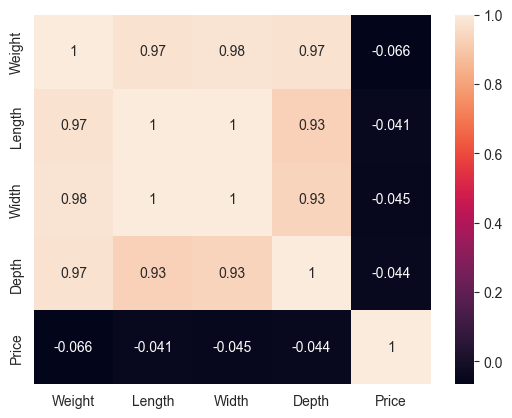

In [17]:
sns.heatmap(data.corr(), annot=True)

<font size = 6>Observation: - </font><br><br>1) Price is not related with this numerical columns<br>
2) But most of the columns are related to each other like Height, Width, Length and Weight
___________________________________________________________________________________________________________________

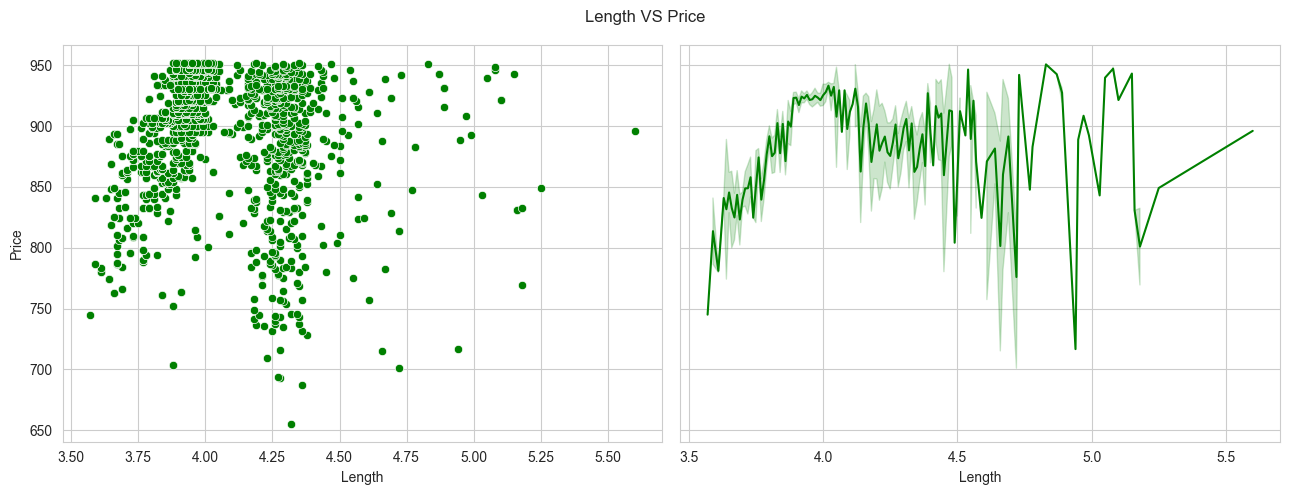

In [18]:
fig, ax  = plt.subplots(1, 2, figsize = (13,5), sharey=True)

sns.scatterplot(x = data['Length'], y = data['Price'], ax = ax[0], color = 'green')

sns.lineplot(x = data['Length'], y = data['Price'], ax = ax[1], color = 'green')
ax[1].set_xticks([3.50,4.00,4.50,5.00,5.50])

fig.suptitle("Length VS Price")

plt.tight_layout()

<font size = 6>Observation: - </font><br><br>
1) There is no Linear relationship between Length and Price as seen in Heatmap
2) But we can see high decrease in price when Length between (4.75-5.00)
3) Also Price is increasing after approx 5.25
4) Highest Price is at Aprox 4.6-4.7
4) There are Outliers too we will deal with them later
_______________________________________________________________________________________________

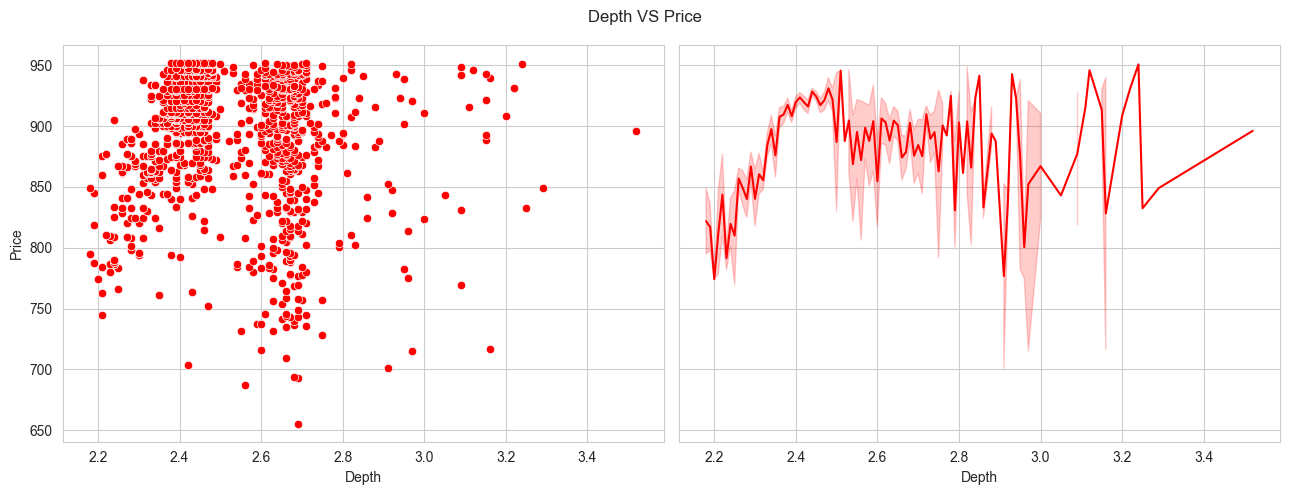

In [19]:
fig, ax  = plt.subplots(1, 2, figsize = (13,5), sharey=True)

sns.scatterplot(x = data['Depth'], y = data['Price'], ax = ax[0], color = 'red')

sns.lineplot(x = data['Depth'], y = data['Price'], ax = ax[1], color = 'red')

fig.suptitle("Depth VS Price")

plt.tight_layout()

<font size = 6>Observation: - </font><br><br>
1) Same as Length there is no Linear relationship between Depth and Price
2) But we also see high increase in Price after 3.3
3) Highest Price is at approx 3.3-3.4
4) There are Outliers too we will deal with them later
_______________________________________________________________________________________________

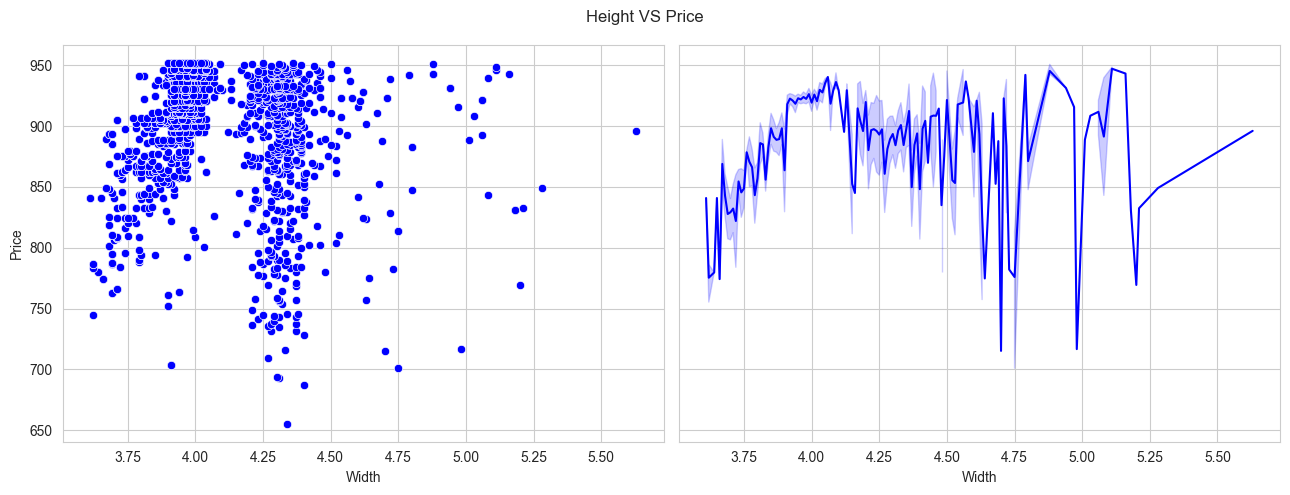

In [20]:
fig, ax  = plt.subplots(1, 2, figsize = (13,5), sharey=True)

sns.scatterplot(x = data['Width'], y = data['Price'], ax = ax[0], color = 'blue')

sns.lineplot(x = data['Width'], y = data['Price'], ax = ax[1], color = 'blue')

fig.suptitle("Height VS Price")

plt.tight_layout()

<font size = 6>Observation: - </font><br><br>
1) Again there is no Linear relationship between Width and Price
2) But we also see high increase in Price after 5.25 width
3) Highest Price is at approx 4.8-4.85 and 5.1
4) There are Outliers too we will deal with them later
_______________________________________________________________________________________________

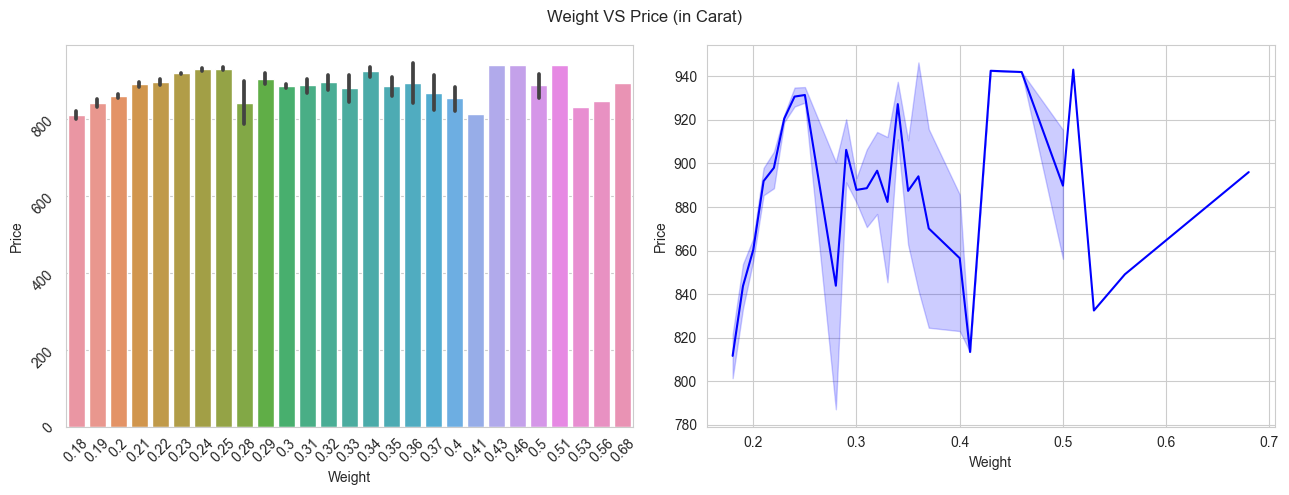

In [21]:
fig, ax  = plt.subplots(1, 2, figsize = (13,5))


sns.barplot(x = data['Weight'], y = data['Price'], ax = ax[0])
ax[0].tick_params(labelrotation = 45)

sns.lineplot(x = data['Weight'], y = data['Price'], ax = ax[1], color = 'blue')

fig.suptitle("Weight VS Price (in Carat)")

plt.tight_layout()

<font size = 6>Observation: - </font><br><br>
1) Again there is no Linear relationship between Weight and Price
2) But we also see high increase in Price after 0.55 weigth
3) Highest Price is at approx 0.45 and 0.51-0.52
4) There are Outliers too we will deal with them later
_______________________________________________________________________________________________

Text(0.5, 1.0, 'Shape')

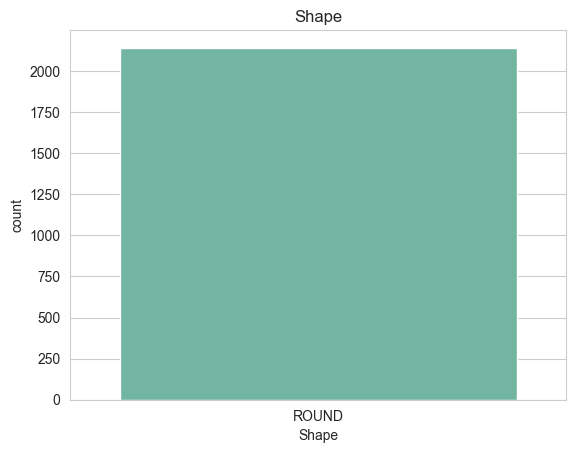

In [22]:
sns.countplot(x = data['Shape'])
plt.title('Shape')

<font size = 6>Observation: - </font><br><br>
1) The dataset is of Round Shape Diamonds so all of them are Round we will drop this column afterwards
_______________________________________

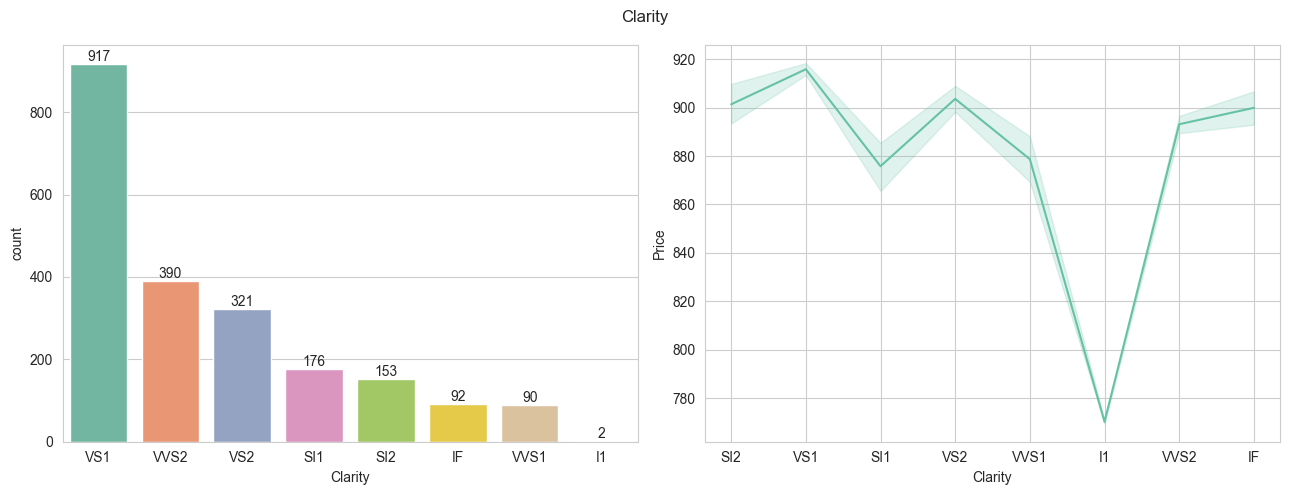

In [23]:
fig, ax  = plt.subplots(1, 2, figsize = (13,5))

sns.countplot(x = data['Clarity'], order = data['Clarity'].value_counts().index, ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

sns.lineplot(x = data['Clarity'], y = data['Price'])

fig.suptitle("Clarity")

plt.tight_layout()

IF – Internally Flawless<br>
VVS1 – Very Very Small Inclusions 1<br>
VVS2 – Very Very Small Inclusions 2<br>
VS1 – Very Small Inclusions 1<br>
VS2 – Very Small Inclusions 2<br>
SI1 – Small Inclusions 1<br>
SI2 – Small Inclusions 2<br>
I1 – Inclusions 1<br>

<font size = 6>Observation: - </font><br><br>
1) More than Half of Diamonds are of Clarity "Very Small Inclusions 1" and also have highest price too
2) Least one is "Inclusions 1" with only 2 Counts
3) Price for most of the diamond are same apart from l1 but it only have 2 counts so not including that
4) We will Combine the least ones to create a 'Other' as feature
_______________________________________

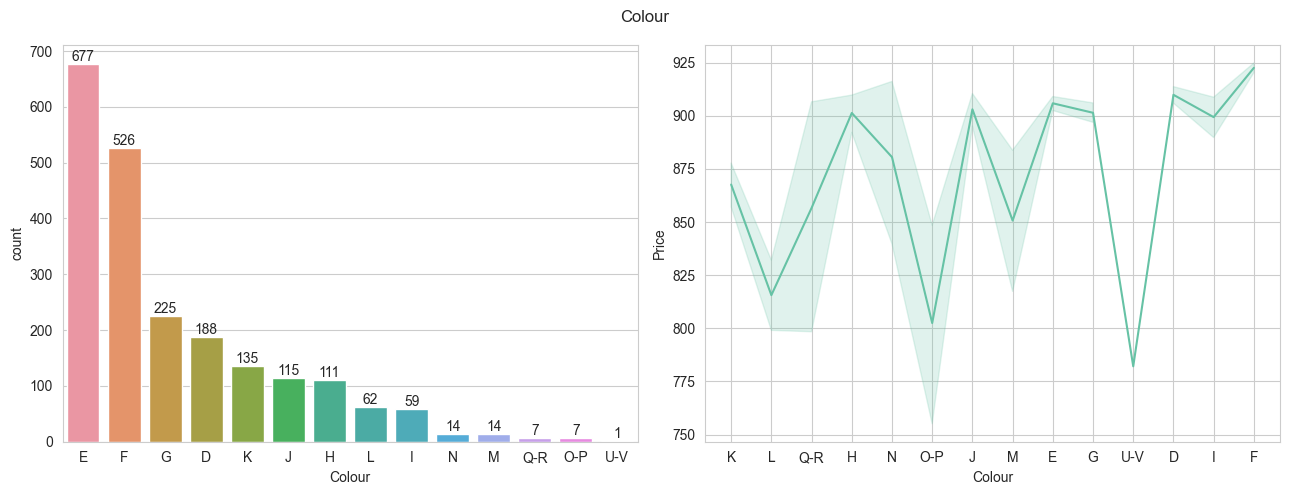

In [24]:
fig, ax  = plt.subplots(1, 2, figsize = (13,5))

sns.countplot(x = data['Colour'], order = data['Colour'].value_counts().index, ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

sns.lineplot(x = data['Colour'], y = data['Price'], ax = ax[1])

fig.suptitle("Colour")

plt.tight_layout()

<font size = 6>Observation: - </font><br><br>
1) More than Half of Diamonds are of Colour "E" and "F"
2) Least one are N, M, Q, R, O, P, U, V with only 2 Counts
3) Price for most of the diamond are same but the data is not more for half of them so we cannot compare prices with them 
4) Highest price is for F Color
4) We will Combine the least ones to create a 'Other' as feature
_______________________________________

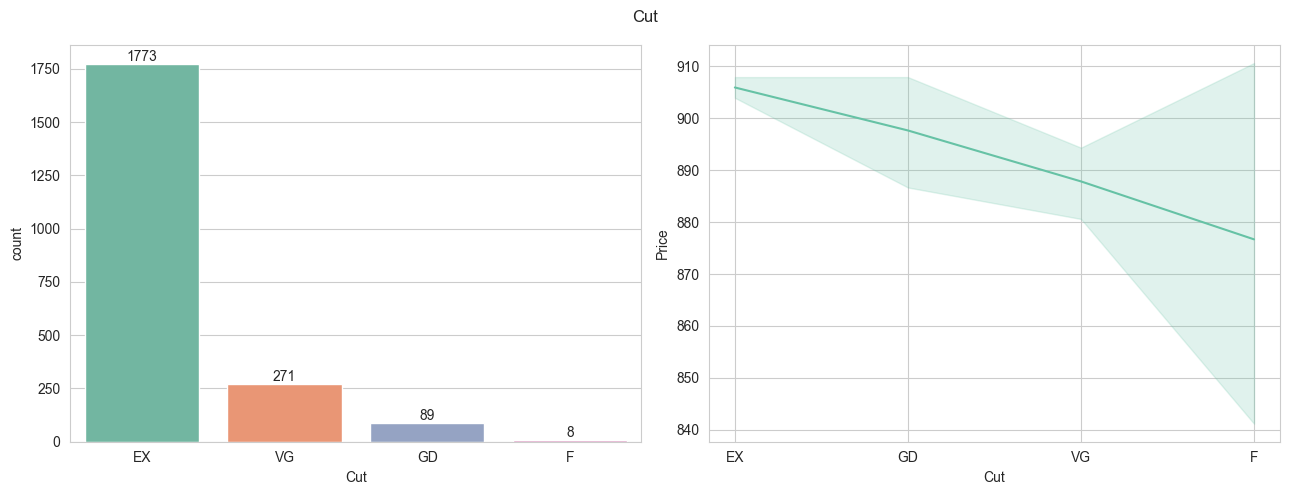

In [25]:
fig, ax  = plt.subplots(1, 2, figsize = (13,5))

sns.countplot(x = data['Cut'], order = data['Cut'].value_counts().index, ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

sns.lineplot(x = data['Cut'], y = data['Price'], ax = ax[1])

fig.suptitle("Cut")

plt.tight_layout()

<font size = 6>Observation: - </font><br><br>
1) More than Half of Diamonds are of Cut "Excellent"
2) Least one is F with 8 counts
3) Price decreases with the Cut it makes sense as Excellent cut diamonds have more price than the other ones
4) Highest price is for EX Cut diamonds
4) We will Combine the least ones to create a 'Other' as feature
_______________________________________

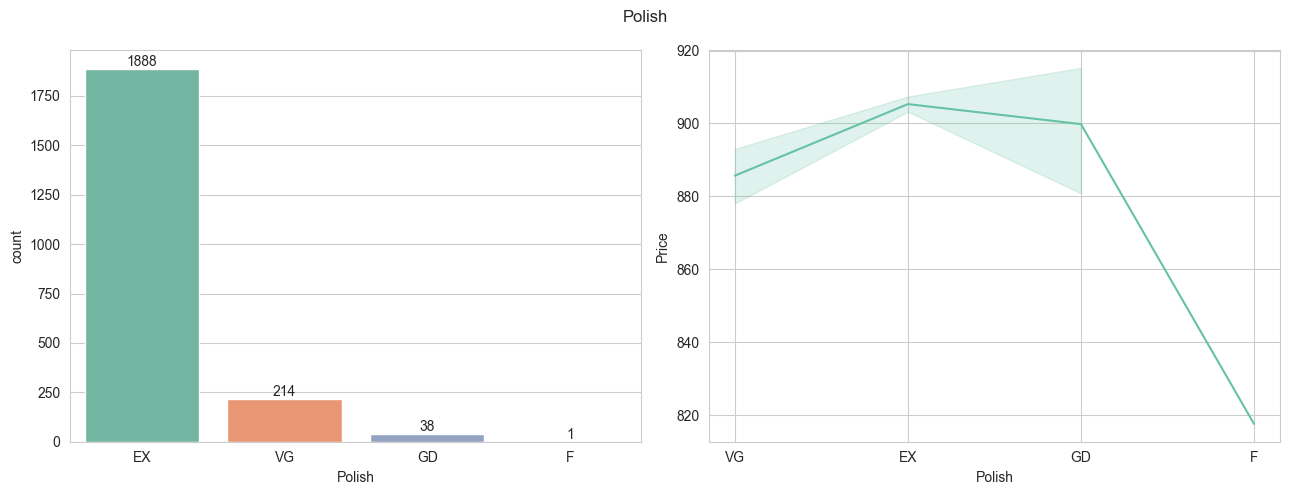

In [26]:
fig, ax  = plt.subplots(1, 2, figsize = (13,5))

sns.countplot(x = data['Polish'], order = data['Polish'].value_counts().index, ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

sns.lineplot(x = data['Polish'], y = data['Price'], ax = ax[1])

fig.suptitle("Polish")

plt.tight_layout()

<font size = 6>Observation: - </font><br><br>
1) More than Half of Diamonds are of "Excellent" Polish
2) Least one is F with just 1 count
3) Price decreases with the Polish it makes sense as Excellent Polished diamonds have more price than the other ones
4) Highest price is for EX Polish diamonds
4) We will Combine the least ones to create a 'Other' as feature
_______________________________________

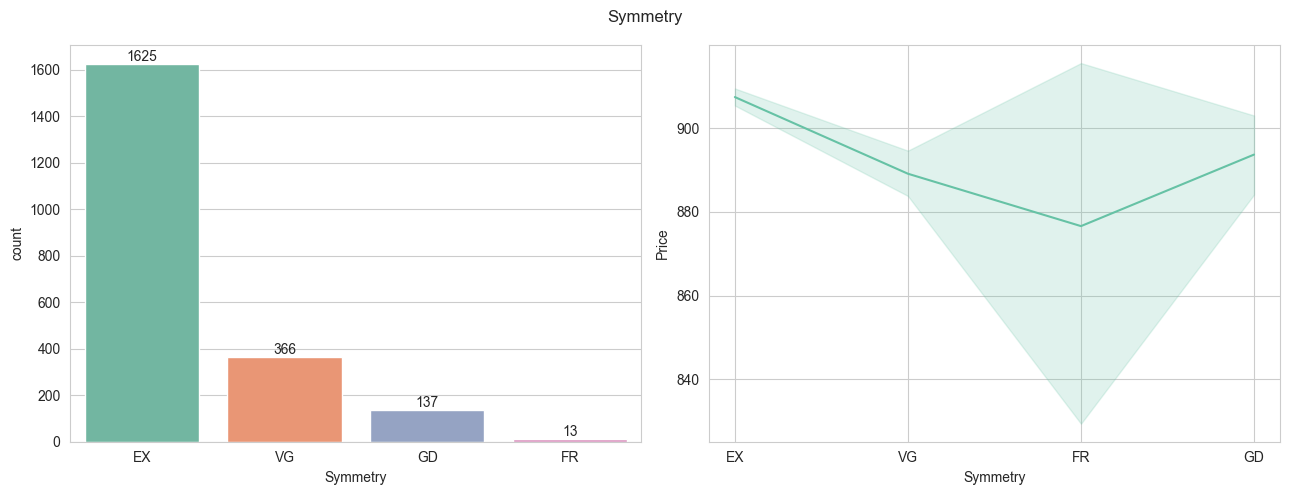

In [27]:
fig, ax  = plt.subplots(1, 2, figsize = (13,5))

sns.countplot(x = data['Symmetry'], order = data['Symmetry'].value_counts().index, ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

sns.lineplot(x = data['Symmetry'], y = data['Price'], ax = ax[1])

fig.suptitle("Symmetry")

plt.tight_layout()

<font size = 6>Observation: - </font><br><br>
1) More than Half of Diamonds are of "Excellent" Symmetry
2) Least one is FR with just 13 counts
3) Price decreases with the Symmetry it makes sense as Excellent Symmetry diamonds have more price than the other ones
4) Highest price is for EX Symmetry diamonds
4) We will Combine the least ones to create a 'Other' as feature
_______________________________________

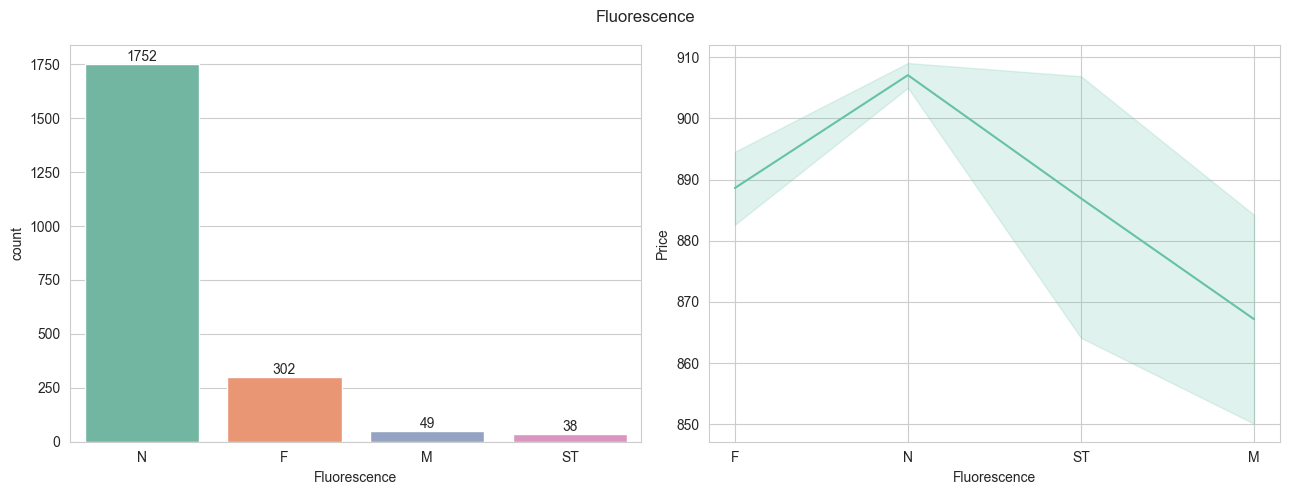

In [28]:
fig, ax  = plt.subplots(1, 2, figsize = (13,5))

sns.countplot(x = data['Fluorescence'], order = data['Fluorescence'].value_counts().index, ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

sns.lineplot(x = data['Fluorescence'], y = data['Price'], ax = ax[1])

fig.suptitle("Fluorescence")

plt.tight_layout()

<font size = 6>Observation: - </font><br><br>
1) More than Half of Diamonds are of "N" Fluorescence
2) Least one are ST and M with just 49 and 38 counts respectively
4) Highest price is for N Fluorescence diamonds
4) We will Combine the least ones to create a 'Other' as feature
_______________________________________

#### Combining the features with minimum count as 'Other' in this columns <br>
1) Colour<br>
2) Clarity<br>
3) Cut <br>
4) Polish <br>
5) Symmetry

In [29]:
#Colour
data['Colour'] = np.where(np.logical_or(data['Colour']=='N',data['Colour']=='M'), 'Other', data['Colour'])
data['Colour'] = np.where(np.logical_or(data['Colour']=='O-P',data['Colour']=='U-V'), 'Other', data['Colour'])
data['Colour'] = np.where(data['Colour'] == 'Q-R', 'Other', data['Colour'])

#Clarity
data['Clarity'] = np.where(np.logical_or(data['Clarity']=='VVS1',data['Clarity']=='VVS2'), 'VVS', data['Clarity'])
data['Clarity'] = np.where(np.logical_or(data['Clarity']=='SI1',data['Clarity']=='SI2'), 'SI', data['Clarity'])
data['Clarity'] = np.where(np.logical_or(data['Clarity']=='VS1',data['Clarity']=='VS2'), 'VS', data['Clarity'])
data['Clarity'] = np.where(np.logical_or(data['Clarity']=='IF',data['Clarity']=='I1'), 'Other', data['Clarity'])

#Cut (Only 8 counts of F so replacing Fair with Very Good)
data['Cut'] = np.where(data['Cut'] == 'F', 'GD', data['Cut'])

#Polish (Only 1 counts of F so replacing Fair with Very Good)
data['Polish'] = np.where(data['Polish'] == 'F', 'GD', data['Polish'])

#Symmetry (Only 13 counts of F so replacing Fair with Very Good)
data['Symmetry'] = np.where(data['Symmetry'] == 'FR', 'GD', data['Symmetry'])

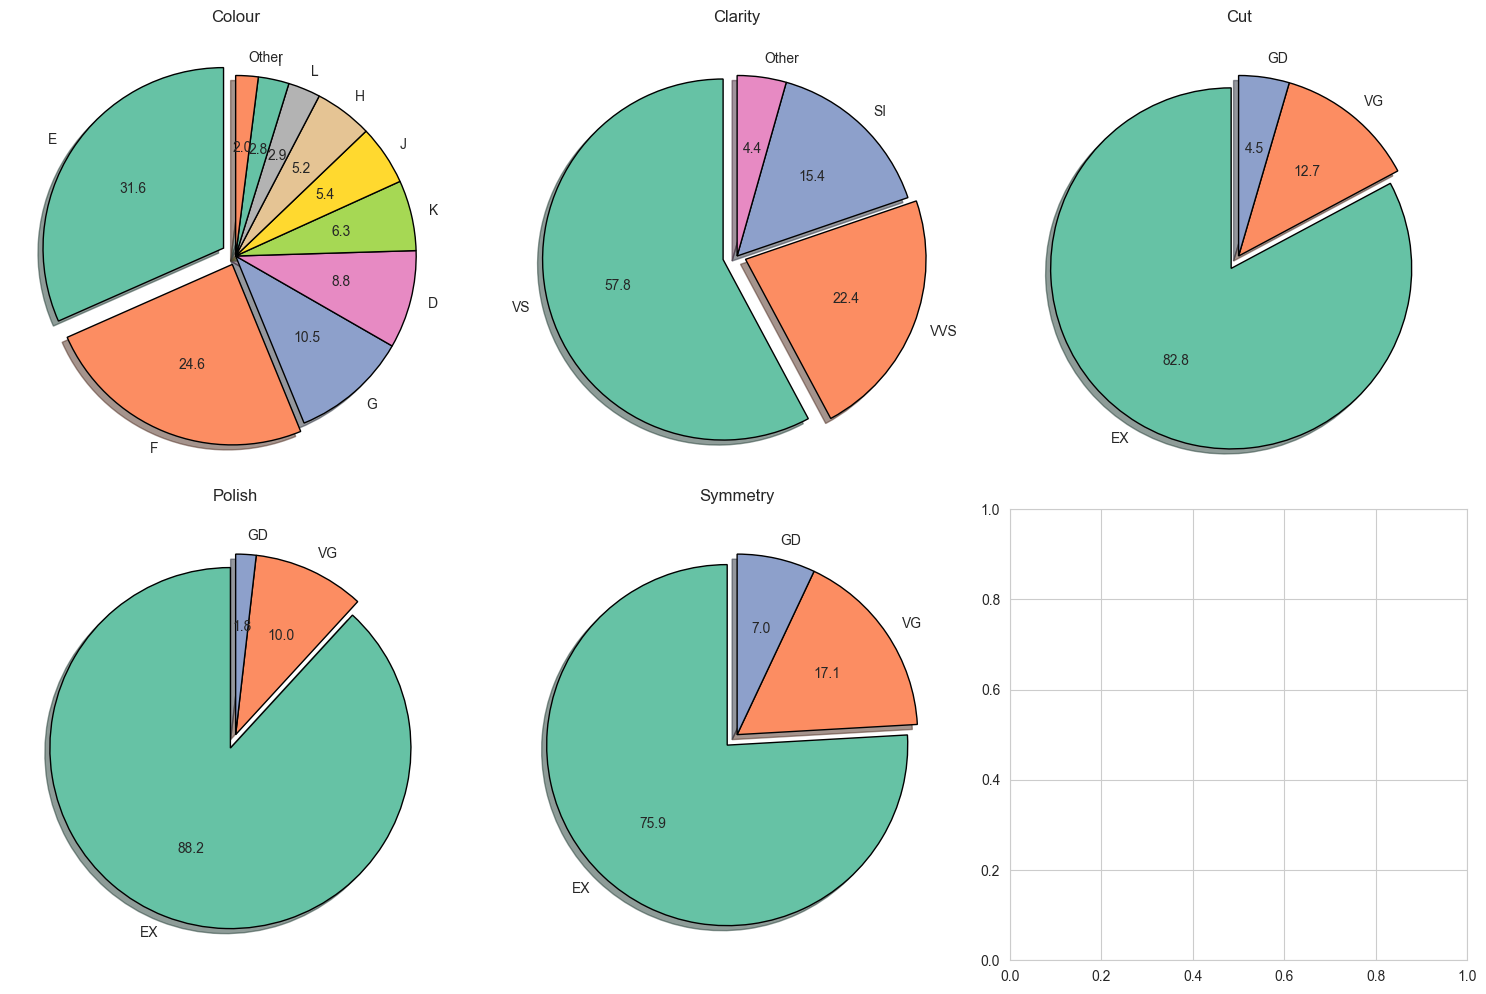

In [30]:
labels = []
for i in ['Colour', 'Clarity', 'Cut', 'Polish', 'Symmetry']:
    labels.append(list(data[i].value_counts().index))

fig, ax = plt.subplots(2, 3, figsize = (15,10))
ax[0][0].pie(data['Colour'].value_counts()[:], labels = labels[0],explode = [0.08,0.05,0,0,0,0,0,0,0,0],wedgeprops={'edgecolor':'black'}, shadow= True, startangle=90, autopct='%1.1f')
ax[0][0].set_title("Colour")

ax[0][1].pie(data['Clarity'].value_counts()[:], labels = labels[1],explode = [0.08,0.05,0,0],wedgeprops={'edgecolor':'black'}, shadow= True, startangle=90, autopct='%1.1f')
ax[0][1].set_title("Clarity")

ax[0][2].pie(data['Cut'].value_counts()[:], labels = labels[2],explode = [0.08,0,0],wedgeprops={'edgecolor':'black'}, shadow= True, startangle=90, autopct='%1.1f')
ax[0][2].set_title("Cut")

ax[1][0].pie(data['Polish'].value_counts()[:], labels = labels[3],explode = [0.08,0,0],wedgeprops={'edgecolor':'black'}, shadow= True, startangle=90, autopct='%1.1f')
ax[1][0].set_title("Polish")

ax[1][1].pie(data['Symmetry'].value_counts()[:], labels = labels[4],explode = [0.08,0,0],wedgeprops={'edgecolor':'black'}, shadow= True, startangle=90, autopct='%1.1f')
ax[1][1].set_title("Symmetry")

plt.tight_layout()

In [31]:
numerical_columns = ['Weight', 'Length', 'Width', 'Depth']
categorical_columns = [i for i in data.columns if i not in numerical_columns if i not in ['Id', 'Price']]

#### Dealing with Outliers

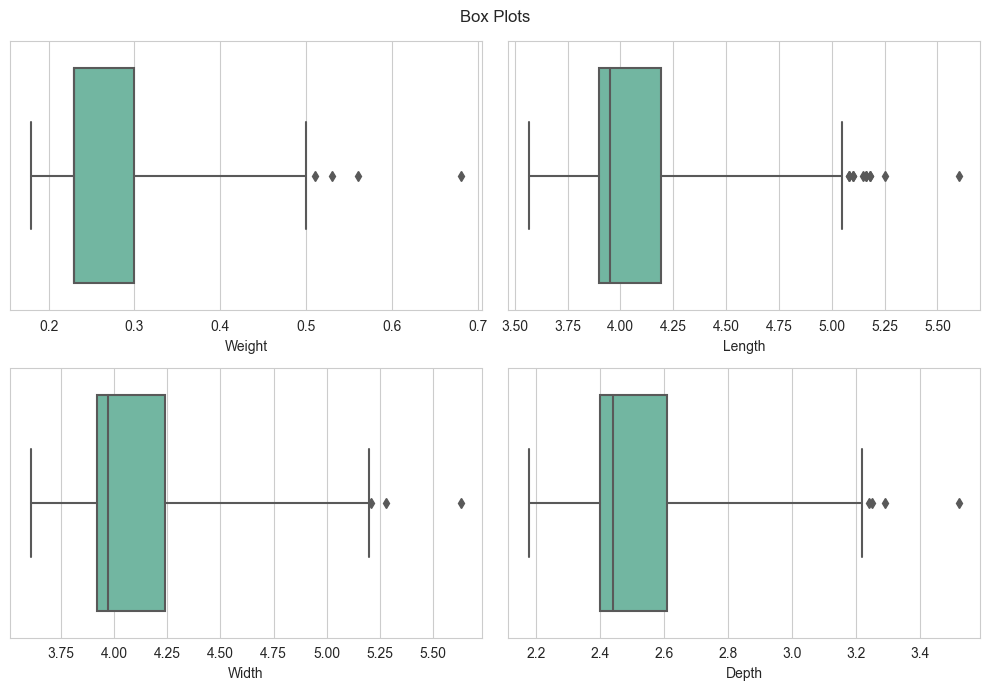

In [32]:
fig, ax = plt.subplots(2,2, figsize = (10,7))
count = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(x = data[numerical_columns[count]], ax = ax[i][j], whis=3)
        count += 1

fig.suptitle("Box Plots")
plt.tight_layout()

#### Removing Outliers using Z-Score

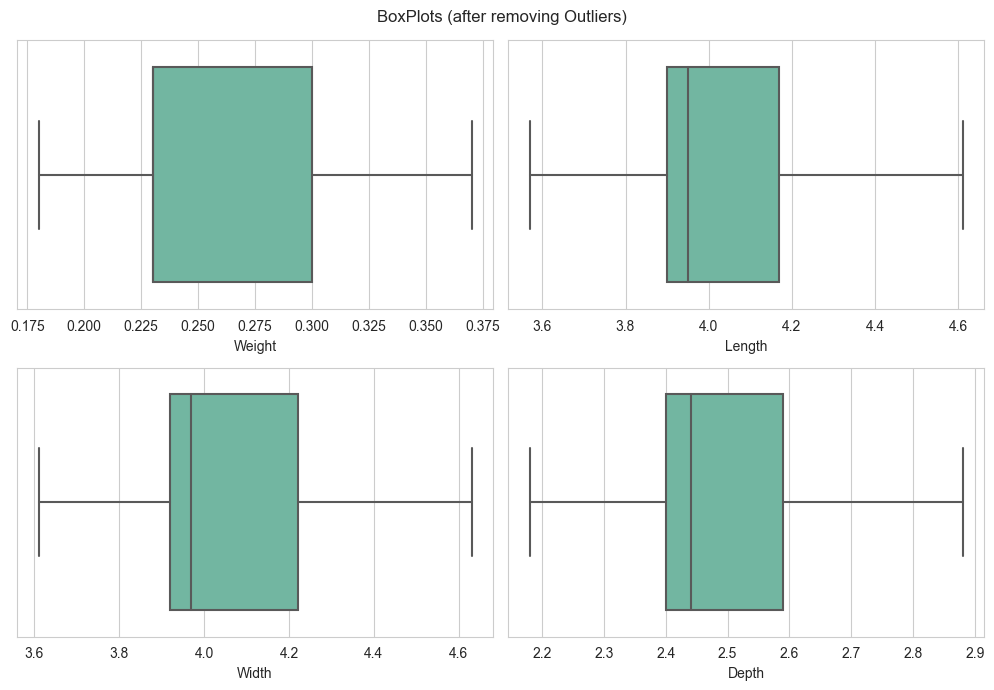

In [33]:
threshold = 3

z_scores = zscore(data[numerical_columns])

outliers = (z_scores>threshold).any(axis = 1)

data = data[~outliers]

fig, ax = plt.subplots(2,2, figsize = (10,7))
count = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(x = data[numerical_columns[count]], ax = ax[i][j], whis=3)
        count += 1

fig.suptitle("BoxPlots (after removing Outliers)")
plt.tight_layout()

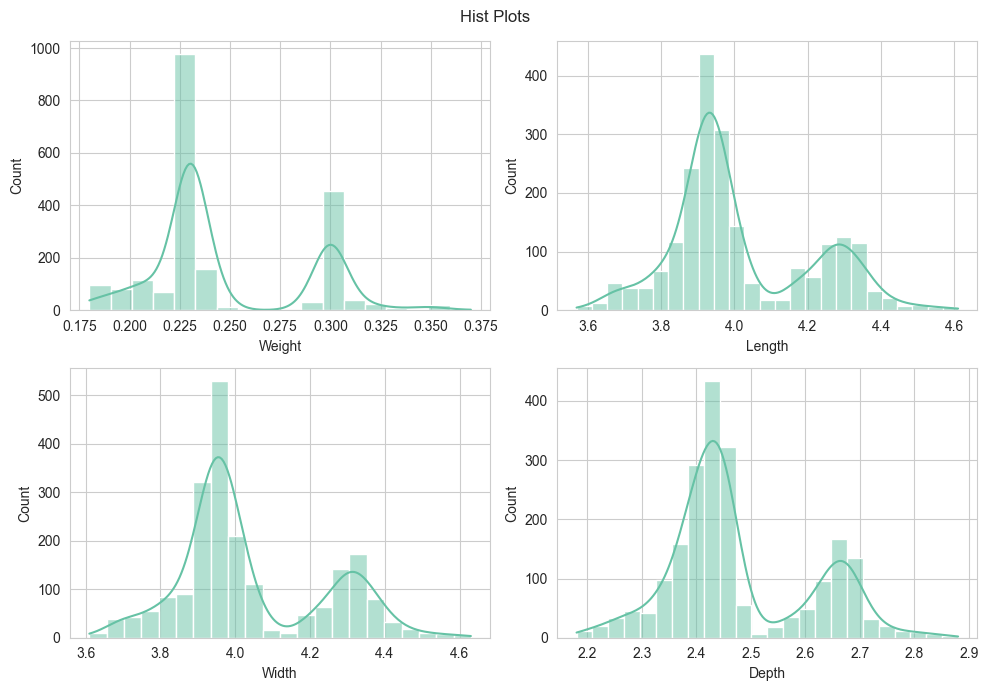

In [34]:
fig, ax = plt.subplots(2,2, figsize = (10,7))
count = 0
for i in range(2):
    for j in range(2):
        sns.histplot(x = data[numerical_columns[count]], ax = ax[i][j], kde=True)
        count += 1

fig.suptitle("Hist Plots")
plt.tight_layout()

<font size = 6>Observation: - </font><br><br>
1) Skewness for all of them are between 0.5-0.6 it seems good with this dataset
_______________________________________

#### <b> Coverting Categorical Columns to Numerical Columns </b>

In [35]:
#Label Encoding to all the categorical columns except Colour as it has 9 different values so we will apply One-Hot Encoding to it

labelencoder = LabelEncoder()

for i in categorical_columns:
    if i != 'Colour':
        data[i] = labelencoder.fit_transform(data[i])

In [36]:
data = pd.get_dummies(data, prefix='Colour', columns=['Colour'])

#### <b> Feature Scaling </b>

In [37]:
minmaxscaler = MinMaxScaler()

data[numerical_columns] = minmaxscaler.fit_transform(data[numerical_columns])

#### Dropping not needed Columns <br>
1) Id<br>
2) Shape<br>

In [38]:
id = data['Id']

data.drop(columns=['Id', 'Shape', 'Price'], inplace=True)

data['Price'] = temp

In [39]:
data.head()

,Weight,Clarity,Cut,Polish,Symmetry,Fluorescence,Length,Width,Depth,Colour_D,Colour_E,Colour_F,Colour_G,Colour_H,Colour_I,Colour_J,Colour_K,Colour_L,Colour_Other,Price
0,0.631579,1,0,2,0,0,0.721154,0.715686,0.728571,0,0,0,0,0,0,0,1,0,0,655.38
1,0.631579,2,1,2,2,2,0.759615,0.774510,0.542857,0,0,0,0,0,0,0,0,1,0,686.87
2,0.631579,1,0,2,0,2,0.682692,0.686275,0.728571,0,0,0,0,0,0,0,1,0,0,692.93
3,0.631579,1,2,2,2,3,0.673077,0.676471,0.714286,0,0,0,0,0,0,0,0,1,0,693.42
5,0.263158,1,1,1,1,2,0.298077,0.294118,0.342857,0,0,0,0,1,0,0,0,0,0,703.36


<AxesSubplot:>

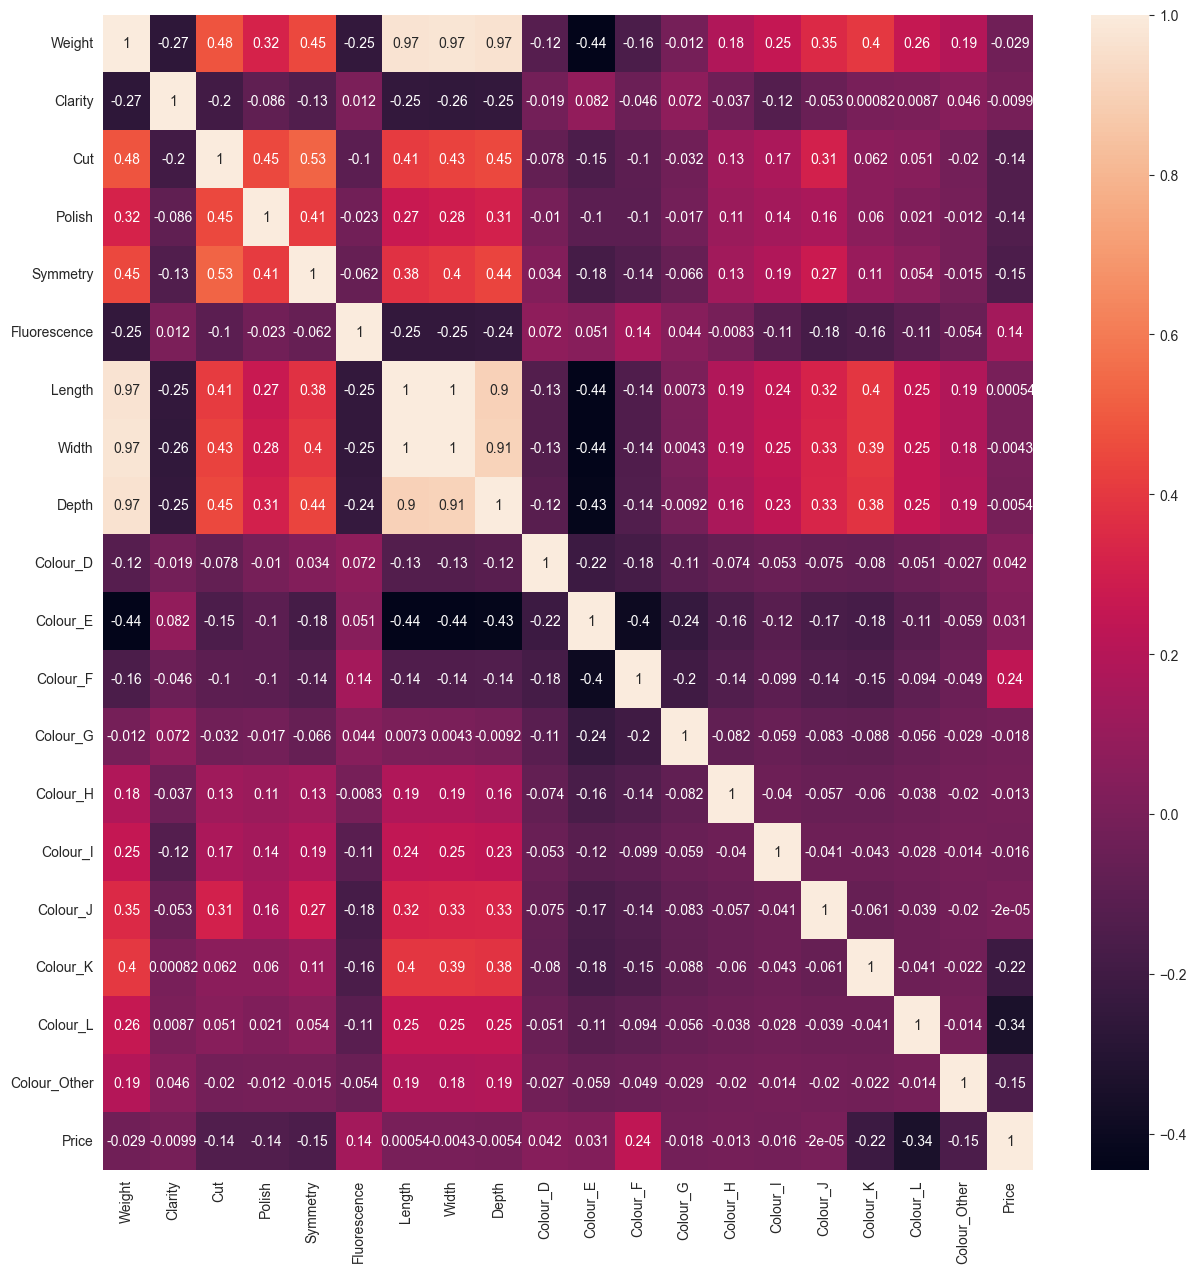

In [40]:
fig, ax = plt.subplots(1,1, figsize = (15,15))
sns.heatmap(data.corr(), annot=True,ax = ax)

<font size = 6>Observation: - </font><br>
Price is mostly related with this columns<br>
1) Cut<br>
2) Polish<br>
3) Symmetry<br>
4) Flourescene<br>
5) Colour
_______________________________________

#### Train Test Split </b>

In [41]:
from sklearn.model_selection import train_test_split

X = data.drop('Price', axis=1)
y = data['Price']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [42]:
print(f'Train Size: - {x_train.shape}\n\nTest Size: - {x_test.shape}')

Train Size: - (1571, 19)

Test Size: - (524, 19)


### <b> Model Development </b>

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import math

#### Function for Cacluating Metrics

In [45]:
# Creating Function to calculate Metrics

res = {'Model':[], 'R2 Score':[], 'MSE':[]}

def metricss(y_pred, model, name = '', ensemble = False):

    fig, ax = plt.subplots(1,2, figsize = (10,5))
    fig.suptitle(name)

    mae = np.round(metrics.mean_absolute_error(y_test, y_pred),2)
    mse = np.round(metrics.mean_squared_error(y_test, y_pred),2)
    r2 = np.round(metrics.r2_score(y_test, y_pred),2)
    rmse = np.round(math.sqrt(mse),2)

    print("*"*50)
    print(f'Train Accuracy: - {np.round(model.score(x_train, y_train), 2)*100}%')
    print(f'Test Accuracy: - {np.round(model.score(x_test, y_test), 2)*100}%')

    print(f'\n**********Errors**********\n\n')
    print('Mean Absolute Error: - ',mae, '\n')
    print('Root-MSE: - ', rmse, '\n')
    print('Mean Squared Error: - ',mse, '\n\n')

    print(f'\n**********R2 Score**********\n')
    print('R2 Score: - ',r2*100, '\n\n')
    
    sns.distplot(y_pred, hist = False, label='predicted Price', ax = ax[0])
    sns.distplot(y_test, hist = False, label='Actual Price', ax = ax[0])
    ax[0].legend()

    if ensemble == True:
        
        temp = pd.DataFrame(
        model.feature_importances_,
        index=x_train.columns, columns=['Features']).sort_values('Features', ascending=True)


        ax[1].barh(temp.index, temp['Features'])
    
    plt.tight_layout()

    res['Model'].append(name)
    res['R2 Score'].append(r2*100)
    res['MSE'].append(mse)



#### <b> Linear Regression </b>

In [46]:
model_linearR = LinearRegression()
model_linearR.fit(x_train, y_train)

LinearRegression()

In [47]:
pred = model_linearR.predict(x_test)

**************************************************
Train Accuracy: - 50.0%
Test Accuracy: - 37.0%

**********Errors**********


Mean Absolute Error: -  25.26 

Root-MSE: -  35.12 

Mean Squared Error: -  1233.6 



**********R2 Score**********

R2 Score: -  37.0 




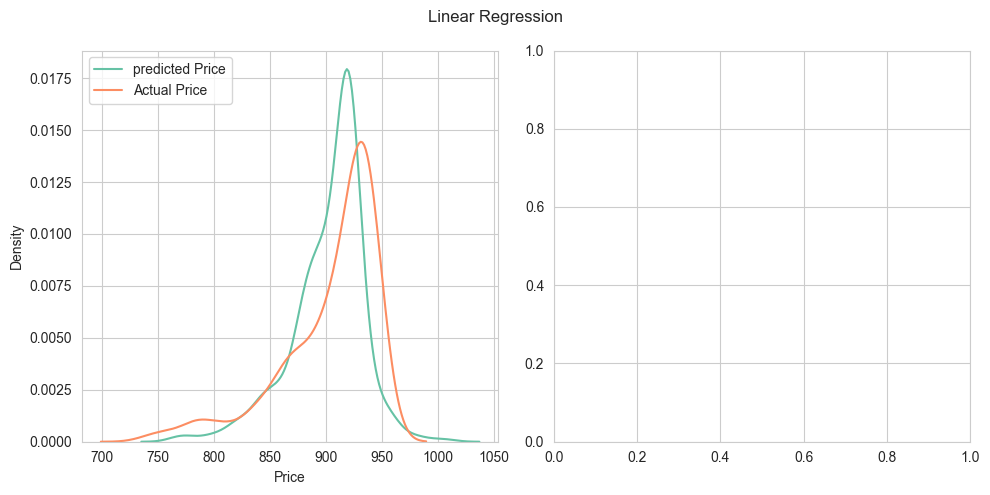

In [48]:
pred_linearR = metricss(pred, model_linearR, name = 'Linear Regression')

pred_linearR

#### <b> Decision Tree </b>

In [49]:
max_depth = [5, 10, 50, 100, 150, 200,500, 1000]
min_samples_split = [2,5,10, 12, 14]
min_samples_leaf = [5, 10, 20, 50, 100]

grid_dt_para = {
                'max_depth':max_depth,
                'min_samples_split': min_samples_split,
                'splitter':['best', 'random'],
                'max_features': ['sqrt', 'log2', 'auto'],
                'min_samples_leaf':min_samples_leaf}

grid_df_CV = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=grid_dt_para, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_df_CV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 50, 100, 150, 200, 500, 1000],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [2, 5, 10, 12, 14],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [50]:
model_dt = grid_df_CV.best_estimator_
model_dt

DecisionTreeRegressor(max_depth=1000, max_features='auto', min_samples_leaf=5,
                      min_samples_split=10)

In [51]:
pred = model_dt.predict(x_test)

**************************************************
Train Accuracy: - 84.0%
Test Accuracy: - 56.99999999999999%

**********Errors**********


Mean Absolute Error: -  16.7 

Root-MSE: -  28.84 

Mean Squared Error: -  832.0 



**********R2 Score**********

R2 Score: -  56.99999999999999 




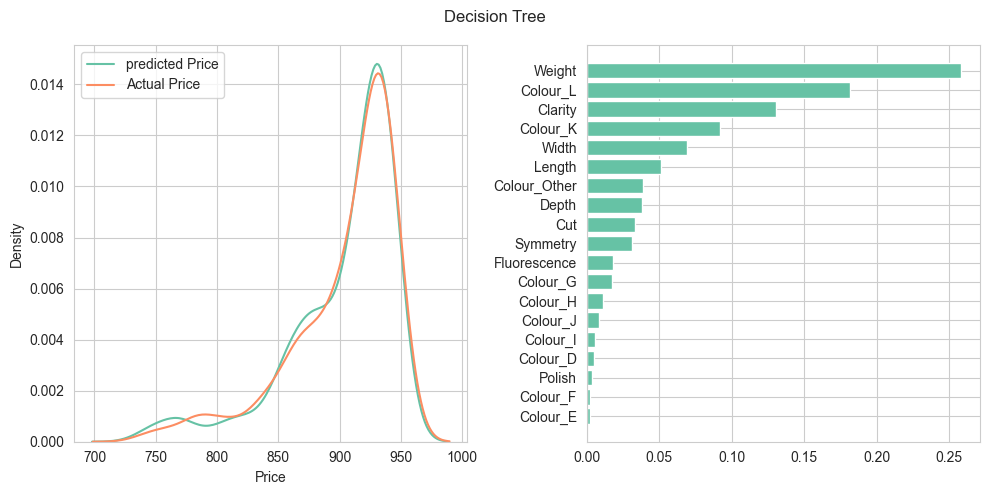

In [52]:
pred_dt = metricss(pred, model_dt, ensemble=True, name = 'Decision Tree')

#### <b> Random Forest </b>

In [53]:
max_depth = [5, 10, 50, 100, 150, 200]
min_samples_split = [2,5,10, 12, 14]
min_samples_leaf = [1,2,5, 10, 50, 100]

grid_rf_para = {
                'max_depth':max_depth,
                'min_samples_split': min_samples_split,
                'max_features': ['sqrt', 'log2', 'auto'],
                'min_samples_leaf':min_samples_leaf}

grid_rf_CV = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid_rf_para, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_rf_CV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 50, 100, 150, 200],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'min_samples_leaf': [1, 2, 5, 10, 50, 100],
                         'min_samples_split': [2, 5, 10, 12, 14]},
             scoring='neg_mean_squared_error')

In [54]:
model_rf = grid_rf_CV.best_estimator_
model_rf

RandomForestRegressor(max_depth=200)

In [55]:
pred = model_rf.predict(x_test)

**************************************************
Train Accuracy: - 97.0%
Test Accuracy: - 75.0%

**********Errors**********


Mean Absolute Error: -  11.52 

Root-MSE: -  21.94 

Mean Squared Error: -  481.56 



**********R2 Score**********

R2 Score: -  75.0 




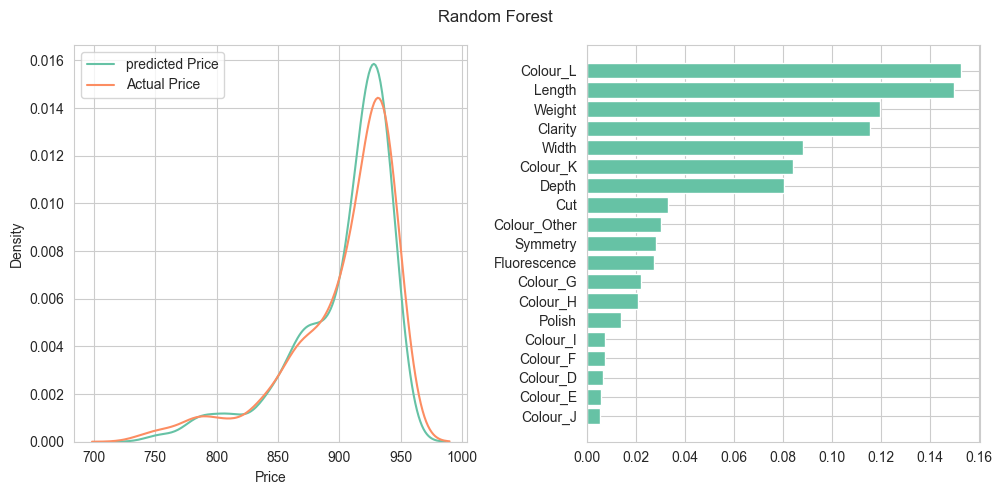

In [56]:
metricss(pred, model_rf, ensemble=True, name = 'Random Forest')

#### <b> XGBOOST </b>

In [57]:
xgb_model = XGBRegressor()

param_grid_xgb = {
    'max_depth': [3, 6, 9,10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}

grid_xg_cv = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error')

grid_xg_cv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estim

In [59]:
model_xgb = grid_xg_cv.best_estimator_

In [60]:
pred = model_xgb.predict(x_test)

**************************************************
Train Accuracy: - 100.0%
Test Accuracy: - 75.0%

**********Errors**********


Mean Absolute Error: -  10.34 

Root-MSE: -  22.2 

Mean Squared Error: -  492.75 



**********R2 Score**********

R2 Score: -  75.0 




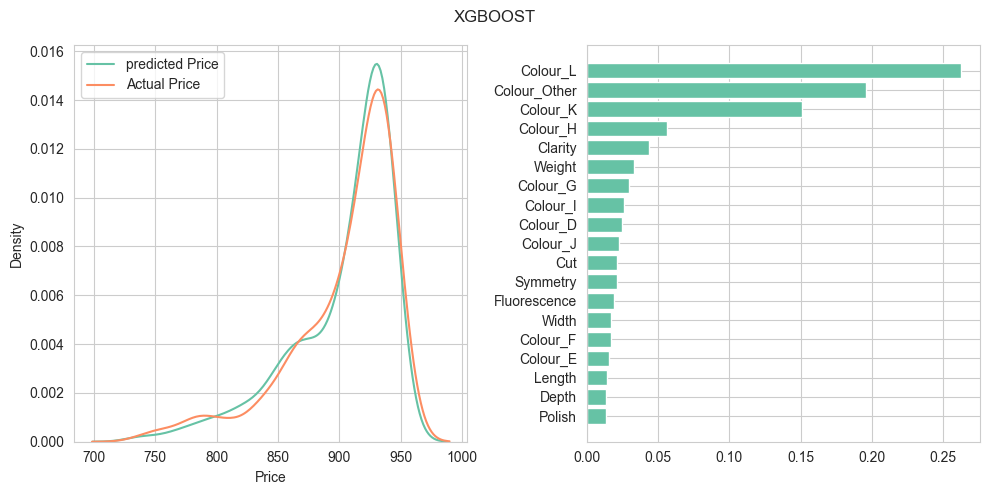

In [61]:
metricss(pred, model_xgb, ensemble=True, name = 'XGBOOST')

### Comparing Models Accuracy

In [62]:
compare_model = pd.DataFrame(res)

compare_model.set_index('Model', inplace=True)

compare_model

,R2 Score,MSE
Model,,
Linear Regression,37.0,1233.60
Decision Tree,57.0,832.00
Random Forest,75.0,481.56
XGBOOST,75.0,492.75


#### <b> Best accuracy, R2 Score and MSE is given by Random Forest Model</b>

#### Making Final predicitons using Random Forest as it gave nice predictions

In [63]:
model_rf.fit(X, y)

RandomForestRegressor(max_depth=200)

In [64]:
pred = model_rf.predict(X)

In [65]:
final = pd.DataFrame({'Id':id, 'Actual Price':data['Price'], 'Predicted Price':pred})

final.set_index('Id')

,Actual Price,Predicted Price
Id,,
1795561,655.38,696.8288
1789678,686.87,734.9285
1791701,692.93,732.7670
1799570,693.42,713.8350
1565775,703.36,712.8496
...,...,...
1773431,932.78,932.7497
1777250,932.78,931.9431
1710115,932.98,932.5369
